In [33]:
import pandas as pd
import seaborn as sns
import numpy as np


import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

from sklearn.model_selection import KFold

from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

In [26]:
df = pd.read_excel('C:\\Users\\mabbasi4\\Desktop\\Churn_ Prediction\\datasets\\E_Commerce_Dataset.xlsx',sheet_name ='E_Comm')

In [27]:
df.head(3)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28


# Undersampling

In [28]:
#Undersampling to handle class imbalance
def Under_Sampling(df):
  df_pos = df[df['Churn'] == 1]
  df_neg = df[df['Churn'] == 0]
  msk = np.random.rand(len(df_neg)) < 0.25
  print (len(msk))
  df_neg_sample = df_neg[msk]
  df_sample_data = pd.concat([df_pos,df_neg_sample])
  df_sample_data = df_sample_data.sample(frac=1).reset_index(drop=True)
  return df_sample_data


4682


In [29]:
df = Under_Sampling(df)  
category_count = df['Churn'].value_counts()
categories = category_count.index

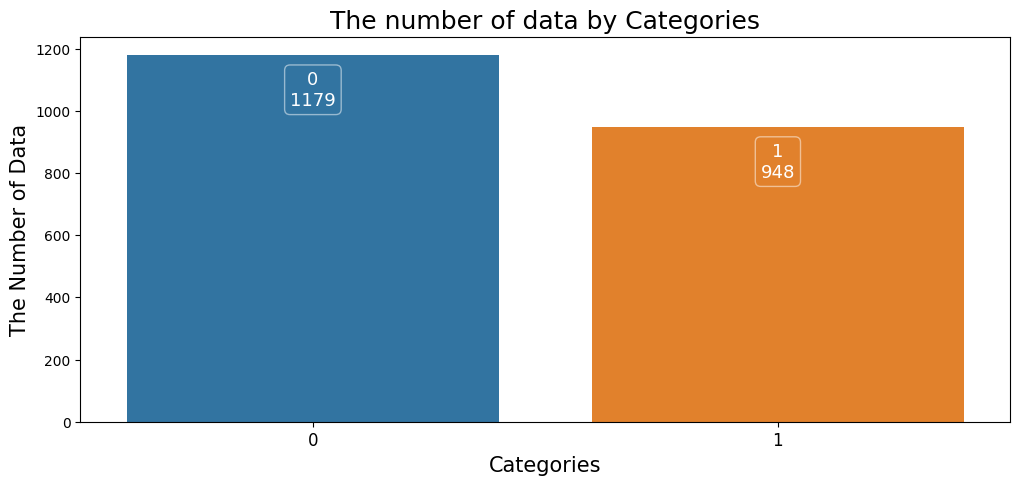

In [30]:


fig = plt.figure(figsize= (12, 5))

ax = fig.add_subplot(111)

sns.barplot(x = category_count.index, y = category_count )

for a, p in enumerate(ax.patches):
    ax.annotate(f'{categories[a]}\n' + format(p.get_height(), '.0f'), xy = (p.get_x() + p.get_width() / 2.0, p.get_height()), xytext = (0,-25), size = 13, color = 'white' , ha = 'center', va = 'center', textcoords = 'offset points', bbox = dict(boxstyle = 'round', facecolor='none',edgecolor='white', alpha = 0.5) )
    
plt.xlabel('Categories', size = 15)

plt.ylabel('The Number of Data', size= 15)

plt.xticks(size = 12)

plt.title("The number of data by Categories" , size = 18)

plt.show()

In [18]:
drop_cols = ['CustomerID', 'Churn']
y = df['Churn']

X = df.drop(drop_cols,axis=1)
X = pd.get_dummies(X)


In [19]:
#Training the model on whole train datasets
X_train,x_test,Y_train,y_test = train_test_split(X,y,test_size = 0.2)

# Model Training 

In [20]:
#Model declaration & training


clf_xgb = xgb.XGBClassifier()

# clf_xgb.fit(X_train,Y_train)
grid_values = {'max_depth': [3,6,20],'n_estimators':[100,500,1000],'learning_rate':[0.01,0.1,0.3]}
grid_clf_xgb = GridSearchCV(clf_xgb, param_grid = grid_values, cv = 5)
grid_clf_xgb.fit(X_train, Y_train)

clf_xgb.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [21]:
pred = clf_xgb.predict(x_test)

# Performance Evaluation

In [23]:
#Molde Evaluation metrivs
cm = confusion_matrix(y_test,pred)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       227
           1       0.92      0.96      0.94       188

    accuracy                           0.94       415
   macro avg       0.94      0.95      0.94       415
weighted avg       0.95      0.94      0.94       415



Text(50.722222222222214, 0.5, 'Truth')

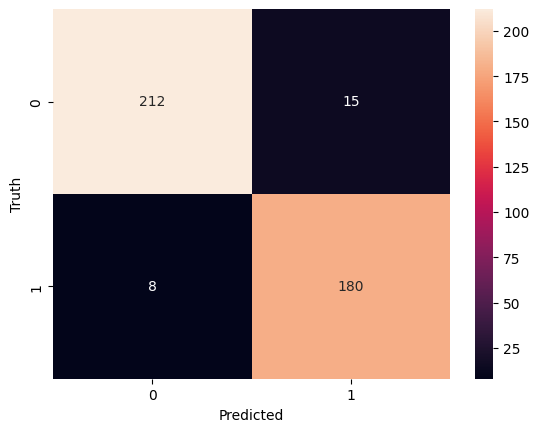

In [24]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')